In [1]:
!pip install opencv-python

     |████████████████████████████████| 49.5 MB 302 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
#================================================================
#
#   File name   : make_data.py
#   Author      : PyLessons
#   Created date: 2020-04-20
#   Website     : https://pylessons.com/
#   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3
#   Description : create mnist example dataset to train custom yolov3
#
#================================================================
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import cv2
import numpy as np
import shutil
import random
from zipfile import ZipFile 
import matplotlib.pyplot as plt

SIZE_X = 416
SIZE_Y = 416
images_num_train = 1000
images_num_test = 200

image_sizes = [14, 14, 14] # small, medium, big



In [3]:
# this helps to run script both from terminal and python IDLE
add_path = "mnist"
if os.getcwd().split(os.sep)[-1] != "mnist":
    add_path = "mnist"
    os.chdir(add_path)
else:
    add_path = ""  


In [4]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
def compute_iou(box1, box2):
    # xmin, ymin, xmax, ymax
    A1 = (box1[2] - box1[0])*(box1[3] - box1[1])
    A2 = (box2[2] - box2[0])*(box2[3] - box2[1])

    xmin = max(box1[0], box2[0])
    ymin = max(box1[1], box2[1])
    xmax = min(box1[2], box2[2])
    ymax = min(box1[3], box2[3])

    if ymin >= ymax or xmin >= xmax: return 0
    return  ((xmax-xmin) * (ymax - ymin)) / (A1 + A2)


In [6]:
def make_image(data, image_path, ratio=1):
    blank = data[0]
    boxes = data[1]
    label = data[2]
    #print(data)

    ID = image_path.split("/")[-1][0]
    #print(image_path)
    image = cv2.imread(image_path)
    
    
    image = np.ones((28,28,3), np.uint8)*255
    cv2.putText(image, image_path.split('/')[-1][0], (5,25), cv2.FONT_HERSHEY_SIMPLEX, 1, (np.random.randint(0, 15),np.random.randint(0, 15),np.random.randint(0, 15)),np.random.randint(1, 5))
    M = cv2.getRotationMatrix2D((28/2,28/2),np.random.randint(-30, 30),1)
    image = cv2.warpAffine(image,M,(28,28), borderValue=(255, 255, 255))
    
    image = cv2.resize(image, (int(28*ratio), int(28*ratio)))
    
    
    h, w, c = image.shape

    while True:
        xmin = np.random.randint(0, SIZE_X-w, 1)[0]
        ymin = np.random.randint(0, SIZE_Y-h, 1)[0]
        xmax = xmin + w
        ymax = ymin + h
        box = [xmin, ymin, xmax, ymax]

        iou = [compute_iou(box, b) for b in boxes]
        if max(iou) < 0.02:
            boxes.append(box)
            label.append(ID)
            break

    for i in range(w):
        for j in range(h):
            x = xmin + i
            y = ymin + j
            blank[y][x] = np.minimum(blank[y][x] , image[j][i])
    # cv2.rectangle(blank, (xmin, ymin), (xmax, ymax), [0, 0, 255], 2)
    return blank


In [7]:
fon1=[]
for image_name in os.listdir(os.getcwd()+f"/fon/"):
    print(image_name)
    if image_name[-4:]=='.jpg':
        fonF = cv2.imread('./fon/'+image_name)
        fon1.append(fonF[:SIZE_Y,:SIZE_X,:])


1-11-800x600.jpg
efed76f20152c514ff2e6137b6dd19d2.jpg
4_small.jpg
tn27xycy6i.jpg
norm.jpg
102m_r5_145-j.jpg
2138.970.jpg
1585602922.6295.jpg
schetchik_vody_svk_15_3_2_dn_15_arzamasskiy_zavod.jpg
.ipynb_checkpoints


In [8]:
for i in range(len(fon1)):
    print(i,fon1[4].shape)

0 (416, 416, 3)
1 (416, 416, 3)
2 (416, 416, 3)
3 (416, 416, 3)
4 (416, 416, 3)
5 (416, 416, 3)
6 (416, 416, 3)
7 (416, 416, 3)
8 (416, 416, 3)


In [9]:

for file in ["train", "test"]:
    if not os.path.exists(f"mnist/{file}"):
        with ZipFile(f"mnist/{file}.zip", 'r') as zip:
            # extracting all the files 
            print(f'Extracting all {file} files now...') 
            zip.extractall()
            shutil.move(file, "mnist")
            print('Done!')

In [10]:
'''m3
90C
95С

30C
45С

kW
кВ

kPa
кПа'''



'm3\n90C\n95С\n\n30C\n45С\n\nkW\nкВ\n\nkPa\nкПа'

In [11]:
for file in ['train','test']:
    images_path = os.getcwd()+f"/mnist_{file}"
    labels_txt = os.getcwd()+f"/mnist_{file}.txt"
    
    if file == 'train': images_num = images_num_train
    if file == 'test': images_num = images_num_test
        
    if os.path.exists(images_path): shutil.rmtree(images_path)
    os.mkdir(images_path)

    image_paths  = [os.path.join(os.path.realpath("."), os.getcwd()+f"/mnist/{file}/" + image_name)
                           for image_name in os.listdir(os.getcwd()+f"/mnist/{file}")]
    
    with open(labels_txt, "w") as wf:
        image_num = 0
        while image_num < images_num:
            image_path = os.path.realpath(os.path.join(images_path, "%06d.jpg" %(image_num+1)))
            #print(image_path)
            annotation = image_path
            #blanks = np.ones(shape=[SIZE_Y,SIZE_X,  3]) * 255
            fonN=random.randint(0, len(fon1)-1)
            blanks =fon1[fonN].copy()
            
            
            bboxes = [[0,0,1,1]]
            labels = [0]
            data = [blanks, bboxes, labels]
            bboxes_num = 0
            
            # ratios small, medium, big objects
            ratios = [[0.5, 0.5], [0.7, 0.7], [1., 1.]]
            for i in range(len(ratios)):
                N = random.randint(0, image_sizes[i])
                if N !=0: bboxes_num += 1
                for _ in range(N):
                    ratio = random.choice(ratios[i])
                    idx = random.randint(0, len(image_paths)-1)
                    data[0] = make_image(data, image_paths[idx], ratio)

            if bboxes_num == 0: continue
                
            data[0] = cv2.cvtColor(data[0], cv2.COLOR_BGR2GRAY)
            data[0] = cv2.Canny(data[0],100,200)
            cv2.imwrite(image_path, data[0])
            for i in range(len(labels)):
                if i == 0: continue
                xmin = str(bboxes[i][0])
                ymin = str(bboxes[i][1])
                xmax = str(bboxes[i][2])
                ymax = str(bboxes[i][3])
                class_ind = str(labels[i])
                annotation += ' ' + ','.join([xmin, ymin, xmax, ymax, str(class_ind)])
            image_num += 1
            print("=> %s" %annotation)
            wf.write(annotation + "\n")

if add_path != "": os.chdir("..")

=> /root/work/Chetchiki/my1/mnist/mnist_train/000001.jpg 388,391,402,405,7 178,148,192,162,1 377,251,391,265,7 239,110,253,124,3 232,94,246,108,6 370,197,384,211,2 162,64,176,78,6 0,255,14,269,1 306,351,320,365,6 313,1,327,15,6 159,188,173,202,2 347,196,361,210,8 367,346,381,360,4 93,391,107,405,7 195,58,214,77,4 307,210,326,229,4 30,323,49,342,4 230,165,249,184,7 114,339,133,358,0 209,147,228,166,7 105,241,133,269,0 257,90,285,118,6 211,215,239,243,2
=> /root/work/Chetchiki/my1/mnist/mnist_train/000002.jpg 27,294,41,308,9 101,287,115,301,8 321,325,335,339,1 391,334,405,348,9 230,21,249,40,2 189,209,208,228,8 146,279,165,298,9 209,153,228,172,2 244,335,263,354,3 41,42,60,61,9 290,263,309,282,0 298,323,317,342,1 122,315,141,334,8 107,69,126,88,2
=> /root/work/Chetchiki/my1/mnist/mnist_train/000003.jpg 340,67,354,81,6 171,67,185,81,5 36,54,50,68,4 270,327,284,341,7 11,372,25,386,6 307,116,326,135,7 380,109,399,128,6 324,372,352,400,0 115,237,143,265,7 324,296,352,324,5 278,249,306,277,3 

=> /root/work/Chetchiki/my1/mnist/mnist_train/000025.jpg 185,369,199,383,8 130,236,144,250,8 351,352,365,366,8 225,92,239,106,1 208,145,222,159,2 46,97,60,111,2 110,345,129,364,8 28,197,47,216,7 382,103,401,122,0 280,327,299,346,4 257,379,276,398,0 313,261,332,280,1 81,158,100,177,0 182,391,201,410,6 144,311,163,330,0 202,57,221,76,6 147,136,166,155,8 281,277,300,296,7 394,279,413,298,4 156,68,175,87,3 7,224,35,252,6 149,98,177,126,4 15,347,43,375,0 292,55,320,83,7 286,121,314,149,6 164,170,192,198,5 306,226,334,254,6 253,187,281,215,1 6,263,34,291,3 385,175,413,203,6 68,241,96,269,6 180,92,208,120,1 282,18,310,46,7
=> /root/work/Chetchiki/my1/mnist/mnist_train/000026.jpg 244,233,258,247,2 133,357,147,371,7 311,364,325,378,7 251,256,265,270,2 53,116,67,130,3 323,311,342,330,8 164,30,183,49,6 43,325,62,344,6 74,361,93,380,0 289,214,317,242,0 181,171,209,199,3 24,372,52,400,5
=> /root/work/Chetchiki/my1/mnist/mnist_train/000027.jpg 378,42,392,56,0 272,116,286,130,6 205,272,219,286,6 320,

=> /root/work/Chetchiki/my1/mnist/mnist_train/000045.jpg 36,12,50,26,2 57,85,71,99,1 170,200,184,214,9 28,252,42,266,8 276,94,290,108,1 246,228,260,242,9 129,106,143,120,2 162,378,176,392,3 119,36,133,50,5 105,159,119,173,0 53,31,72,50,4 49,65,68,84,8 371,139,390,158,2 380,62,408,90,4 172,149,200,177,7 280,323,308,351,2 372,226,400,254,3 321,84,349,112,3 308,316,336,344,4 74,70,102,98,2 254,308,282,336,6 165,276,193,304,3 121,304,149,332,1 71,172,99,200,5 107,330,135,358,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000046.jpg 121,203,135,217,9 331,77,345,91,6 100,293,114,307,8 154,186,168,200,1 129,305,143,319,7 162,214,176,228,7 323,357,342,376,2 346,46,365,65,0 278,123,297,142,4 294,320,313,339,8 213,32,232,51,1 53,282,72,301,8 347,285,366,304,9 99,203,118,222,5 33,1,52,20,9 355,125,374,144,2 245,50,264,69,8 31,277,50,296,8 7,233,35,261,3 373,36,401,64,0 44,336,72,364,7
=> /root/work/Chetchiki/my1/mnist/mnist_train/000047.jpg 149,364,168,383,3 145,228,164,247,5 183,348,202,367,3 1

=> /root/work/Chetchiki/my1/mnist/mnist_train/000065.jpg 210,110,224,124,1 352,195,371,214,0 255,285,274,304,2 33,128,52,147,8 87,304,106,323,0 105,167,124,186,1 322,300,341,319,9 344,272,363,291,4 60,227,79,246,1 315,186,334,205,2 37,224,56,243,6 367,123,386,142,3 368,351,387,370,2 100,194,128,222,6 64,80,92,108,5 167,90,195,118,0 155,162,183,190,8 44,348,72,376,7 118,356,146,384,3 158,386,186,414,9 273,294,301,322,2 178,243,206,271,2 182,39,210,67,4 33,185,61,213,0 219,349,247,377,4 158,315,186,343,7 335,335,363,363,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000066.jpg 394,165,408,179,1 227,214,241,228,8 287,59,301,73,8 106,123,120,137,9 116,90,130,104,6 40,318,54,332,5 168,253,182,267,9 189,124,203,138,5 138,326,152,340,6 272,45,286,59,4 250,58,264,72,3 130,251,144,265,2 193,282,212,301,9 236,281,255,300,6 139,281,158,300,8 89,165,117,193,7 72,70,100,98,8 285,273,313,301,3 90,263,118,291,9 254,307,282,335,8 241,94,269,122,3 161,202,189,230,9 251,166,279,194,3 354,24,382,52,5
=>

=> /root/work/Chetchiki/my1/mnist/mnist_train/000085.jpg 136,299,150,313,4 139,339,153,353,5 225,141,239,155,3 198,64,212,78,3 96,201,110,215,0 351,67,365,81,6 183,368,197,382,8 247,96,261,110,7 10,209,24,223,2 156,32,170,46,1 286,173,300,187,9 268,36,282,50,1 387,335,401,349,8 158,109,172,123,7 220,332,239,351,7 151,205,170,224,4 326,215,345,234,9 148,151,167,170,4 391,84,410,103,4 271,322,290,341,3 318,379,337,398,7 28,373,47,392,3 159,336,178,355,6 358,169,377,188,0 354,87,373,106,7 207,369,235,397,3 246,345,274,373,7 54,290,82,318,1 351,139,379,167,2 111,113,139,141,5 11,69,39,97,4 176,22,204,50,0 121,161,149,189,2 207,93,235,121,0 377,287,405,315,4 40,19,68,47,6 334,24,362,52,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000086.jpg 248,171,262,185,0 271,63,285,77,2 134,139,148,153,5 180,308,194,322,2 275,116,289,130,6 20,129,34,143,5 38,389,52,403,1 136,382,150,396,0 225,45,239,59,3 289,370,308,389,2 61,369,80,388,7 110,365,129,384,3 114,254,133,273,0 168,363,187,382,5 135,193,1

=> /root/work/Chetchiki/my1/mnist/mnist_train/000107.jpg 352,57,366,71,5 109,147,123,161,7 386,124,400,138,0 292,182,306,196,2 228,283,242,297,5 162,264,176,278,8 173,129,187,143,4 300,254,314,268,1 0,280,14,294,7 106,312,120,326,2 146,142,165,161,2 196,272,215,291,6 86,364,105,383,8 65,98,84,117,4 137,263,156,282,6 182,89,201,108,7 106,378,125,397,6 44,184,63,203,6 242,42,261,61,2 165,357,184,376,7 152,54,180,82,5 53,259,81,287,7 95,100,123,128,4 236,235,264,263,7 202,361,230,389,2 75,139,103,167,7 15,322,43,350,6 349,211,377,239,0 130,346,158,374,2 353,323,381,351,0 169,169,197,197,3 342,364,370,392,6 293,2,321,30,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000108.jpg 60,345,74,359,3 268,164,282,178,8 65,326,79,340,6 253,92,267,106,1 50,40,64,54,1 219,25,233,39,6 162,64,176,78,3 14,73,28,87,7 135,51,149,65,4 186,69,200,83,4 197,20,211,34,4 190,253,204,267,0 148,245,167,264,0 269,272,288,291,2 84,209,103,228,8 151,114,170,133,2 73,245,92,264,2 363,48,382,67,1 259,179,278,198,5 274

=> /root/work/Chetchiki/my1/mnist/mnist_train/000131.jpg 88,201,102,215,9 107,228,121,242,4 225,160,239,174,0 229,211,243,225,4 370,202,384,216,1 399,247,413,261,0 304,298,332,326,9 375,18,403,46,7 292,62,320,90,4 137,126,165,154,0 328,107,356,135,8 17,252,45,280,8 2,144,30,172,1 107,241,135,269,5 63,264,91,292,3 262,91,290,119,2 180,249,208,277,9 221,35,249,63,6
=> /root/work/Chetchiki/my1/mnist/mnist_train/000132.jpg 179,128,193,142,0 398,336,412,350,1 295,49,309,63,9 116,269,130,283,2 314,277,328,291,4 35,122,49,136,6 306,357,325,376,7 386,121,405,140,3 41,390,60,409,9 229,277,248,296,8 138,321,157,340,4 54,101,73,120,9 91,126,110,145,9 256,16,275,35,1 199,258,218,277,6 19,156,38,175,6 94,192,113,211,0 69,133,88,152,9 209,194,237,222,2 372,72,400,100,1 175,338,203,366,4 324,92,352,120,3 375,301,403,329,4
=> /root/work/Chetchiki/my1/mnist/mnist_train/000133.jpg 336,169,350,183,1 161,335,175,349,7 96,14,110,28,9 247,130,261,144,5 281,394,295,408,1 396,124,410,138,2 183,164,197,178,0 6

=> /root/work/Chetchiki/my1/mnist/mnist_train/000152.jpg 159,300,173,314,3 162,21,176,35,0 222,312,236,326,4 40,118,54,132,9 176,181,190,195,4 249,44,263,58,9 203,170,217,184,1 193,75,207,89,2 242,355,256,369,8 229,147,243,161,0 215,218,229,232,3 223,186,237,200,8 102,322,116,336,6 221,22,235,36,1 40,16,59,35,5 103,156,122,175,9 2,3,21,22,2 368,362,387,381,1 281,3,309,31,0 20,378,48,406,1 366,107,394,135,7 314,212,342,240,6 366,47,394,75,3 293,116,321,144,1 27,306,55,334,8 300,162,328,190,2 134,275,162,303,3 6,43,34,71,2 259,265,287,293,8 65,28,93,56,2 88,353,116,381,2 71,134,99,162,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000153.jpg 339,128,353,142,8 143,200,157,214,6 147,295,161,309,0 328,104,342,118,7 265,110,279,124,1 260,263,274,277,8 157,361,171,375,7 257,337,271,351,9 129,80,143,94,6 330,401,344,415,0 172,33,186,47,1 125,220,139,234,4 25,299,39,313,4 148,46,162,60,2 238,50,257,69,9 330,41,358,69,9 297,61,325,89,6 30,263,58,291,5 125,105,153,133,9 21,149,49,177,8 161,258,1

=> /root/work/Chetchiki/my1/mnist/mnist_train/000173.jpg 59,137,73,151,5 31,195,45,209,0 226,258,240,272,2 368,222,382,236,3 304,43,318,57,2 14,262,28,276,2 20,172,34,186,1 302,69,316,83,7 311,240,325,254,9 4,286,18,300,6 30,46,49,65,7 339,227,358,246,2 243,89,262,108,7 202,80,221,99,0 165,45,184,64,9 120,193,139,212,3 161,78,180,97,4 177,201,196,220,5 91,132,110,151,1 32,219,51,238,1 240,7,259,26,6 218,184,237,203,7 143,163,171,191,8 289,120,317,148,5 194,381,222,409,7 0,328,28,356,2 231,133,259,161,5 74,276,102,304,9 147,117,175,145,5 326,308,354,336,7 130,350,158,378,7 191,114,219,142,1 311,81,339,109,5 354,95,382,123,3 103,31,131,59,4
=> /root/work/Chetchiki/my1/mnist/mnist_train/000174.jpg 259,376,273,390,1 332,248,351,267,1 204,167,223,186,6 187,229,206,248,8 115,88,134,107,0 112,302,131,321,1 248,333,267,352,0 110,135,129,154,4 351,8,370,27,1 121,278,140,297,3 327,285,346,304,5 75,65,94,84,5 108,223,127,242,0 166,189,185,208,3 354,82,382,110,4 168,298,196,326,7 57,207,85,235,0 3

=> /root/work/Chetchiki/my1/mnist/mnist_train/000192.jpg 132,86,146,100,1 68,32,82,46,4 242,61,256,75,2 153,117,167,131,7 240,217,254,231,2 379,104,393,118,0 301,202,315,216,2 392,77,406,91,7 209,178,223,192,4 51,375,65,389,9 255,122,269,136,4 214,54,228,68,1 166,40,180,54,7 340,134,354,148,7 302,271,321,290,3 331,184,350,203,7 300,99,319,118,1 92,196,111,215,0 188,228,207,247,6 373,274,392,293,5 287,19,306,38,3 354,326,373,345,1 257,17,276,36,6 3,291,22,310,6 269,376,288,395,8 157,382,176,401,3 362,14,381,33,2 345,270,364,289,4 232,30,260,58,2 102,273,130,301,8 88,91,116,119,7 16,197,44,225,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000193.jpg 187,172,201,186,7 130,201,144,215,6 136,95,150,109,6 297,389,311,403,6 279,128,293,142,5 34,14,48,28,8 336,80,350,94,9 115,58,129,72,4 155,279,169,293,2 26,126,40,140,9 272,298,286,312,3 371,322,385,336,2 267,178,281,192,2 11,364,25,378,6 250,11,269,30,9 60,293,79,312,5 250,69,269,88,7
=> /root/work/Chetchiki/my1/mnist/mnist_train/000194.jp

=> /root/work/Chetchiki/my1/mnist/mnist_train/000215.jpg 170,139,184,153,2 337,83,356,102,4 12,23,31,42,3 41,367,60,386,8 345,388,364,407,5 152,99,171,118,9 9,53,28,72,5 390,92,409,111,1 373,132,392,151,2 60,145,79,164,6 250,18,269,37,1 107,227,126,246,0 193,248,221,276,1 301,278,329,306,0 54,193,82,221,9 58,285,86,313,1 107,160,135,188,8 336,304,364,332,1 267,292,295,320,2 199,310,227,338,3 23,106,51,134,1 351,10,379,38,1
=> /root/work/Chetchiki/my1/mnist/mnist_train/000216.jpg 158,118,172,132,7 69,386,83,400,1 117,346,131,360,2 199,326,213,340,7 36,236,50,250,9 181,286,200,305,3 166,131,185,150,8 95,353,114,372,7 37,335,56,354,3 319,205,338,224,6 35,252,54,271,6 263,169,282,188,2 106,239,125,258,0 279,91,307,119,4
=> /root/work/Chetchiki/my1/mnist/mnist_train/000217.jpg 103,304,117,318,1 61,39,75,53,0 277,103,291,117,6 161,366,175,380,4 161,54,175,68,2 175,189,194,208,7 373,218,401,246,2 115,165,143,193,4 224,152,252,180,7 327,276,355,304,4 221,326,249,354,7 241,220,269,248,9
=> /roo

=> /root/work/Chetchiki/my1/mnist/mnist_train/000241.jpg 370,389,384,403,3 196,104,210,118,1 329,81,343,95,5 169,334,183,348,3 342,255,356,269,9 322,226,341,245,2 39,40,67,68,8 98,12,126,40,1 216,331,244,359,7 349,164,377,192,3 68,13,96,41,2 182,330,210,358,5 113,165,141,193,2 80,209,108,237,6 153,156,181,184,7 64,288,92,316,3 260,122,288,150,7
=> /root/work/Chetchiki/my1/mnist/mnist_train/000242.jpg 243,292,257,306,3 307,146,321,160,7 149,44,163,58,8 149,249,163,263,7 313,20,327,34,0 173,6,187,20,0 122,114,136,128,8 280,192,299,211,7 141,303,160,322,1 118,309,137,328,4 304,112,323,131,5 366,99,385,118,7 31,388,50,407,3 256,307,275,326,3 259,383,278,402,4 273,24,292,43,6
=> /root/work/Chetchiki/my1/mnist/mnist_train/000243.jpg 246,358,260,372,4 78,295,92,309,4 237,151,251,165,5 0,256,14,270,6 355,214,369,228,5 169,110,183,124,6 243,387,257,401,0 385,129,399,143,7 8,8,27,27,2 392,347,411,366,4 11,365,30,384,6 160,50,179,69,5 314,358,333,377,1 385,65,404,84,3 253,294,272,313,3 243,52,262

=> /root/work/Chetchiki/my1/mnist/mnist_train/000264.jpg 135,374,149,388,4 333,215,347,229,0 251,215,265,229,4 242,201,256,215,8 168,174,182,188,2 393,186,407,200,2 356,5,370,19,1 38,57,52,71,1 291,26,305,40,9 143,51,162,70,0 75,277,94,296,8 323,195,342,214,3 327,332,346,351,2 229,376,248,395,4 260,281,279,300,1 325,153,344,172,6 216,117,235,136,9 309,269,328,288,0 159,2,178,21,6 5,352,33,380,1 298,320,326,348,2 359,114,387,142,7 235,52,263,80,8 330,104,358,132,0 117,62,145,90,8 24,159,52,187,9 380,276,408,304,9 227,301,255,329,9 183,116,211,144,1 361,33,389,61,7 164,255,192,283,7 284,99,312,127,6 251,78,279,106,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000265.jpg 200,364,214,378,1 47,219,75,247,4 302,312,330,340,6 86,171,114,199,0 120,135,148,163,0 31,90,59,118,1 346,94,374,122,8 231,325,259,353,4 11,153,39,181,7 51,343,79,371,9 90,217,118,245,5
=> /root/work/Chetchiki/my1/mnist/mnist_train/000266.jpg 32,105,46,119,0 308,135,322,149,9 377,260,396,279,3 357,111,376,130,6 273,160,

=> /root/work/Chetchiki/my1/mnist/mnist_train/000288.jpg 217,376,231,390,3 389,220,408,239,2 327,330,355,358,7 227,140,255,168,6 149,183,177,211,9 348,295,376,323,1 230,273,258,301,0 343,218,371,246,1 364,114,392,142,6 300,298,328,326,2 75,304,103,332,9 101,319,129,347,4 335,132,363,160,8 244,9,272,37,0 20,102,48,130,8 69,175,97,203,7
=> /root/work/Chetchiki/my1/mnist/mnist_train/000289.jpg 364,371,378,385,4 277,154,291,168,3 72,97,86,111,6 94,84,108,98,6 371,55,385,69,7 342,263,356,277,8 244,36,258,50,8 227,46,241,60,0 228,121,242,135,8 167,160,181,174,1 131,66,150,85,9 6,124,25,143,9 188,189,207,208,4 32,377,51,396,3 106,216,125,235,2 316,384,335,403,8 19,329,38,348,1 292,243,311,262,3 235,383,254,402,9 164,333,183,352,9 42,396,61,415,5 320,228,339,247,2 71,214,90,233,1 163,130,182,149,2 181,91,209,119,2 255,60,283,88,8 357,253,385,281,8 88,243,116,271,5 134,355,162,383,2 351,90,379,118,1 378,358,406,386,3 329,149,357,177,1 2,242,30,270,4 170,212,198,240,3 232,343,260,371,0 386,272,4

=> /root/work/Chetchiki/my1/mnist/mnist_train/000312.jpg 244,80,258,94,7 162,194,176,208,6 65,349,79,363,3 233,328,247,342,0 321,184,335,198,2 201,194,215,208,4 295,121,309,135,8 326,247,340,261,0 302,281,316,295,1 111,231,125,245,8 193,82,207,96,8 1,104,15,118,1 110,389,124,403,5 233,125,247,139,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000313.jpg 232,285,246,299,4 167,311,181,325,5 170,133,184,147,0 98,148,112,162,7 325,297,339,311,9 198,389,212,403,5 207,78,221,92,1 154,186,168,200,4 91,29,105,43,7 389,19,403,33,6 136,330,155,349,5 22,290,41,309,5 13,211,32,230,1 281,354,300,373,4 4,387,23,406,3 112,379,131,398,9 122,233,141,252,6 359,312,378,331,2 8,23,27,42,0 57,218,76,237,2 250,45,269,64,0 313,119,332,138,0 25,5,53,33,0 353,161,381,189,6 336,14,364,42,0 117,19,145,47,0 243,11,271,39,8 384,229,412,257,2 336,347,364,375,3 141,207,169,235,8 280,236,308,264,6 256,153,284,181,2 103,303,131,331,3 185,271,213,299,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000314.jpg 5,274,19,

=> /root/work/Chetchiki/my1/mnist/mnist_train/000334.jpg 338,194,352,208,8 230,8,244,22,2 72,25,86,39,8 19,182,33,196,4 313,159,327,173,1 314,40,328,54,3 369,97,383,111,4 315,73,329,87,0 390,80,404,94,0 342,159,356,173,8 306,332,320,346,5 337,260,351,274,9 34,246,53,265,9 93,192,112,211,1 254,180,273,199,8 62,126,81,145,8 229,320,248,339,2 301,53,320,72,2 227,370,246,389,5 68,219,87,238,2 193,249,212,268,3 266,210,285,229,4 256,395,275,414,4 195,359,214,378,7 95,131,114,150,9 161,245,189,273,1 95,323,123,351,4 34,199,62,227,3 66,170,94,198,8 228,122,256,150,0 129,198,157,226,5 260,110,288,138,9 248,312,276,340,5 362,170,390,198,3 6,218,34,246,0 280,229,308,257,8 146,36,174,64,8 2,358,30,386,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000335.jpg 194,311,208,325,7 263,136,277,150,0 288,157,302,171,4 401,236,415,250,0 164,300,178,314,5 18,233,32,247,9 254,156,268,170,9 150,78,164,92,2 133,376,147,390,7 168,93,182,107,0 193,145,207,159,3 85,145,99,159,0 307,100,326,119,4 394,75,413,94,

=> /root/work/Chetchiki/my1/mnist/mnist_train/000356.jpg 86,105,100,119,8 10,31,24,45,4 224,361,238,375,5 131,380,145,394,0 102,186,116,200,0 370,385,384,399,3 234,32,248,46,1 320,104,334,118,5 179,150,193,164,5 77,81,91,95,5 13,376,27,390,2 314,1,328,15,4 213,116,232,135,6 171,177,190,196,5 138,194,157,213,5 52,46,71,65,0 24,396,43,415,5 131,54,150,73,7 110,130,138,158,8 128,334,156,362,4 106,252,134,280,6 297,320,325,348,9 173,14,201,42,2 233,72,261,100,0 274,231,302,259,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000357.jpg 97,106,111,120,3 241,289,255,303,0 283,171,297,185,5 293,325,307,339,8 144,114,158,128,6 221,31,235,45,8 225,117,239,131,9 45,79,59,93,2 322,12,336,26,2 345,128,359,142,6
=> /root/work/Chetchiki/my1/mnist/mnist_train/000358.jpg 210,76,224,90,3 332,222,346,236,2 144,18,158,32,7 301,206,315,220,2 145,143,173,171,7 212,11,240,39,7 348,6,376,34,2 103,204,131,232,8 96,152,124,180,6 319,243,347,271,3 266,76,294,104,0 345,124,373,152,8
=> /root/work/Chetchiki/my1/mn

=> /root/work/Chetchiki/my1/mnist/mnist_train/000381.jpg 359,353,373,367,5 269,197,283,211,8 4,296,18,310,6 13,25,27,39,5 360,383,374,397,2 347,249,361,263,6 113,9,127,23,1 261,69,275,83,3 21,298,40,317,6 54,41,73,60,7 295,241,314,260,0 323,87,342,106,3 376,204,395,223,0 69,193,88,212,2 291,37,319,65,4 39,189,67,217,9 376,270,404,298,1 177,110,205,138,2 370,112,398,140,0 331,106,359,134,4 64,12,92,40,1 144,350,172,378,3 254,25,282,53,0 103,342,131,370,6 157,263,185,291,4 91,252,119,280,9 356,5,384,33,0 222,312,250,340,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000382.jpg 325,189,339,203,2 323,283,337,297,2 240,346,254,360,3 75,303,89,317,1 146,275,160,289,7 208,293,222,307,7 226,378,240,392,4 316,231,330,245,9 238,136,252,150,3 43,374,57,388,1 36,14,50,28,2 155,180,169,194,0 64,264,78,278,0 200,38,228,66,6 107,24,135,52,1 69,386,97,414,7 275,280,303,308,1 54,213,82,241,5 340,312,368,340,7 126,199,154,227,9 199,310,227,338,3 357,90,385,118,6 387,220,415,248,4 41,40,69,68,0
=> /root

=> /root/work/Chetchiki/my1/mnist/mnist_train/000405.jpg 292,58,306,72,8 129,206,143,220,5 31,269,45,283,3 4,152,18,166,3 270,125,289,144,2 113,68,132,87,9 376,279,395,298,8 322,133,341,152,4 153,250,172,269,3 101,354,120,373,9 375,50,394,69,0 289,211,308,230,1 80,68,99,87,3 26,250,45,269,1 168,100,187,119,3 154,185,182,213,4 44,47,72,75,6 266,68,294,96,9 362,147,390,175,1 301,371,329,399,6 283,269,311,297,6 332,183,360,211,3 341,292,369,320,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000406.jpg 160,162,174,176,1 73,151,87,165,2 114,157,128,171,8 130,76,144,90,3 390,79,404,93,1 283,373,297,387,7 293,26,307,40,1 289,122,303,136,3 103,261,117,275,0 44,94,58,108,4 65,309,79,323,8 305,307,319,321,4 199,318,213,332,7 95,206,109,220,1 10,302,29,321,3 327,42,346,61,1 12,181,31,200,9 172,331,191,350,9 181,213,209,241,1 246,340,274,368,6 345,208,373,236,8 124,387,152,415,4 224,29,252,57,6 262,201,290,229,8 163,22,191,50,6 57,102,85,130,0 312,86,340,114,0
=> /root/work/Chetchiki/my1/mnist/mn

=> /root/work/Chetchiki/my1/mnist/mnist_train/000426.jpg 162,371,176,385,8 79,176,93,190,8 153,324,167,338,6 146,64,160,78,6 65,182,79,196,2 66,377,80,391,7 98,318,112,332,2 213,6,232,25,0 206,298,225,317,4 391,43,410,62,7 261,351,280,370,3 340,298,359,317,4 25,218,44,237,4 89,104,108,123,1 49,83,68,102,2 216,127,235,146,5 171,325,190,344,9 352,210,371,229,7 326,337,345,356,2 117,21,145,49,3 261,78,289,106,8 228,349,256,377,8 228,100,256,128,5 2,177,30,205,2 186,209,214,237,8 309,367,337,395,4 148,141,176,169,4 184,128,212,156,2 156,30,184,58,8 18,114,46,142,3 180,385,208,413,9 350,345,378,373,3
=> /root/work/Chetchiki/my1/mnist/mnist_train/000427.jpg 401,44,415,58,1 315,120,329,134,9 399,323,413,337,4 78,319,92,333,6 178,94,197,113,4 370,188,389,207,9 257,383,276,402,4 198,21,217,40,4 294,259,313,278,3 392,360,411,379,5 14,175,42,203,8 256,81,284,109,3 233,108,261,136,6 241,310,269,338,8 73,191,101,219,9 23,139,51,167,6 50,137,78,165,7 208,315,236,343,1
=> /root/work/Chetchiki/my1/mni

=> /root/work/Chetchiki/my1/mnist/mnist_train/000449.jpg 295,3,309,17,3 146,11,160,25,8 53,297,67,311,8 5,3,19,17,4 385,240,399,254,4 142,69,156,83,8 207,178,221,192,6 344,138,358,152,9 374,113,388,127,6 370,386,389,405,2 306,284,325,303,0 354,27,373,46,9 249,61,268,80,3 165,387,184,406,0 246,375,265,394,7 219,332,238,351,2 162,139,181,158,1 46,101,65,120,2 74,86,93,105,1 114,275,133,294,2
=> /root/work/Chetchiki/my1/mnist/mnist_train/000450.jpg 245,361,259,375,2 160,370,174,384,1 247,55,261,69,5 374,78,388,92,1 14,223,28,237,1 28,272,42,286,8 100,16,114,30,0 184,376,198,390,6 45,244,64,263,8 294,31,313,50,4 18,100,37,119,8 55,221,74,240,2 201,223,220,242,7 78,371,97,390,8 54,71,82,99,4
=> /root/work/Chetchiki/my1/mnist/mnist_train/000451.jpg 179,284,193,298,4 209,147,223,161,1 71,88,85,102,6 39,326,53,340,8 234,395,253,414,4 200,323,219,342,8 9,3,28,22,4 31,125,50,144,9 34,43,53,62,7 34,294,53,313,3 260,38,279,57,7 291,251,310,270,9 317,252,336,271,4 75,161,94,180,1 236,224,264,252,9 

=> /root/work/Chetchiki/my1/mnist/mnist_train/000470.jpg 309,69,323,83,3 368,321,382,335,1 262,151,276,165,3 222,306,236,320,7 116,142,130,156,3 167,211,181,225,3 213,97,227,111,0 352,89,366,103,6 356,103,370,117,3 365,168,379,182,7 87,352,101,366,0 281,158,295,172,4 57,98,76,117,4 36,192,55,211,6 123,31,151,59,9 232,267,260,295,8 190,279,218,307,9 50,53,78,81,1 254,47,282,75,0 77,373,105,401,3
=> /root/work/Chetchiki/my1/mnist/mnist_train/000471.jpg 25,162,39,176,4 253,241,267,255,6 134,107,148,121,3 100,187,114,201,6 382,236,396,250,3 394,400,408,414,7 19,193,33,207,7 134,267,148,281,7 302,273,316,287,3 292,326,306,340,7 113,37,127,51,2 184,255,198,269,7 60,300,74,314,3 274,122,293,141,1 87,326,106,345,0 145,288,164,307,7 161,38,180,57,5 331,126,350,145,5 108,238,127,257,0 140,53,159,72,7 48,75,76,103,5 233,48,261,76,2 287,221,315,249,3 372,112,400,140,5 214,129,242,157,5 243,291,271,319,0 198,48,226,76,2 268,82,296,110,3 181,321,209,349,8 300,373,328,401,0 334,56,362,84,7 247,372,27

=> /root/work/Chetchiki/my1/mnist/mnist_train/000490.jpg 366,378,380,392,8 36,319,50,333,5 281,125,295,139,7 175,330,189,344,1 93,392,107,406,8 29,229,43,243,8 138,30,152,44,1 138,264,152,278,0 210,52,224,66,1 83,203,97,217,3 49,344,63,358,9 177,277,196,296,5 189,245,208,264,0 194,127,213,146,6 281,276,300,295,2 318,329,346,357,8 302,52,330,80,9 339,234,367,262,9 330,28,358,56,1 383,295,411,323,9 346,167,374,195,1 371,63,399,91,6 228,374,256,402,5 4,2,32,30,0 273,323,301,351,2 199,88,227,116,3 343,287,371,315,3
=> /root/work/Chetchiki/my1/mnist/mnist_train/000491.jpg 210,89,224,103,0 275,328,289,342,2 146,253,160,267,2 302,10,316,24,5 348,187,362,201,1 356,262,370,276,5 164,80,178,94,8 40,204,59,223,7 86,177,105,196,6 110,330,129,349,2 20,177,48,205,8 228,147,256,175,9 74,346,102,374,3 89,111,117,139,5 136,12,164,40,9 26,279,54,307,8 312,151,340,179,9 101,150,129,178,1 80,238,108,266,4
=> /root/work/Chetchiki/my1/mnist/mnist_train/000492.jpg 301,91,315,105,2 316,349,330,363,7 388,141,4

=> /root/work/Chetchiki/my1/mnist/mnist_train/000512.jpg 6,375,25,394,0 60,143,79,162,6 211,4,230,23,5 78,2,97,21,8 318,242,337,261,6 359,60,378,79,1 141,57,160,76,1 88,140,107,159,6 99,170,118,189,2 280,313,299,332,4 234,89,253,108,4 38,110,66,138,2 322,7,350,35,9 5,255,33,283,5 72,50,100,78,0 33,321,61,349,3 363,301,391,329,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000513.jpg 193,106,207,120,3 289,365,303,379,3 377,265,391,279,2 312,338,326,352,5 37,195,51,209,6 308,106,322,120,6 138,342,152,356,0 262,219,276,233,9 20,309,34,323,3 90,269,109,288,3 10,182,29,201,7 211,146,239,174,3
=> /root/work/Chetchiki/my1/mnist/mnist_train/000514.jpg 56,169,70,183,0 314,130,328,144,2 129,180,143,194,7 337,133,351,147,8 191,61,205,75,1 19,354,33,368,4 238,94,252,108,3 38,68,57,87,0 261,337,280,356,3 144,374,163,393,8 59,236,78,255,3 155,3,174,22,0 384,212,403,231,5 126,28,145,47,9 90,390,109,409,1 63,378,82,397,4 118,285,137,304,9 260,377,279,396,9 274,35,302,63,8 169,161,197,189,6 165,283,19

=> /root/work/Chetchiki/my1/mnist/mnist_train/000535.jpg 115,283,129,297,0 263,40,277,54,3 78,216,92,230,2 226,251,240,265,0 90,204,104,218,1 24,5,38,19,7 159,215,173,229,1 294,145,308,159,0 57,159,71,173,4 161,230,180,249,8 173,289,192,308,3 80,333,99,352,4 9,151,28,170,5 312,382,331,401,4 170,258,189,277,0 328,96,347,115,0 20,327,48,355,3 34,367,62,395,1 303,316,331,344,8 310,266,338,294,9 50,41,78,69,4 31,247,59,275,8 258,251,286,279,7
=> /root/work/Chetchiki/my1/mnist/mnist_train/000536.jpg 63,221,77,235,5 374,46,388,60,8 50,380,64,394,7 298,144,312,158,3 346,238,360,252,7 312,259,326,273,9 184,132,198,146,4 30,309,44,323,2 68,120,87,139,4 156,36,175,55,5 275,395,294,414,3 297,90,316,109,4 243,118,262,137,2 300,311,319,330,9 361,314,380,333,0 7,78,26,97,8 314,339,333,358,5 42,259,70,287,4
=> /root/work/Chetchiki/my1/mnist/mnist_train/000537.jpg 70,321,84,335,0 130,16,144,30,3 196,90,210,104,8 31,157,45,171,6 59,196,73,210,3 364,8,378,22,1 389,287,403,301,7 27,348,41,362,8 60,225,74

=> /root/work/Chetchiki/my1/mnist/mnist_train/000557.jpg 393,1,407,15,7 316,251,330,265,7 90,137,104,151,0 25,135,39,149,3 347,305,361,319,0 20,78,34,92,8 382,293,396,307,0 129,95,143,109,6 262,115,281,134,3 248,143,267,162,8 303,75,322,94,2 219,233,238,252,8 110,14,129,33,4 353,233,372,252,1 320,197,339,216,0 228,94,247,113,4 146,134,165,153,9 379,216,398,235,5 64,384,92,412,0 37,313,65,341,9 242,185,270,213,7 384,105,412,133,6 279,278,307,306,8 201,104,229,132,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000558.jpg 34,224,48,238,8 345,90,359,104,9 239,91,253,105,6 3,98,17,112,7 360,222,379,241,2 199,282,218,301,8 332,201,351,220,4 265,145,284,164,9 342,309,361,328,7 323,220,342,239,8 187,64,206,83,7 356,26,375,45,8 383,149,402,168,8 26,115,54,143,1 95,297,123,325,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000559.jpg 4,293,18,307,5 66,253,80,267,7 21,165,35,179,4 205,369,224,388,2 257,134,276,153,0 221,308,240,327,1 241,385,260,404,5 137,75,156,94,0 279,157,298,176,3 348,211,3

=> /root/work/Chetchiki/my1/mnist/mnist_train/000578.jpg 128,118,142,132,1 318,124,332,138,7 15,268,29,282,7 235,122,249,136,3 44,97,58,111,0 25,240,39,254,4 215,169,229,183,0 126,169,140,183,5 160,391,174,405,6 378,53,392,67,2 116,306,135,325,1 205,216,224,235,4 294,214,313,233,2 54,300,73,319,3 255,285,274,304,4 272,114,300,142,2 139,359,167,387,0 72,46,100,74,8 30,358,58,386,1 184,176,212,204,9 241,183,269,211,7 286,176,314,204,5 184,62,212,90,0 349,86,377,114,4 308,387,336,415,5 321,143,349,171,1
=> /root/work/Chetchiki/my1/mnist/mnist_train/000579.jpg 358,56,372,70,4 287,23,301,37,0 138,121,152,135,4 351,329,365,343,3 252,311,266,325,2 169,259,183,273,2 239,382,253,396,5 91,20,119,48,3 259,91,287,119,3 224,315,252,343,1 6,381,34,409,6 38,284,66,312,4 309,202,337,230,9 2,228,30,256,7 114,177,142,205,3 31,43,59,71,2
=> /root/work/Chetchiki/my1/mnist/mnist_train/000580.jpg 51,370,65,384,0 321,289,335,303,1 277,12,291,26,2 378,59,392,73,7 6,318,20,332,0 378,23,392,37,2 57,95,71,109,9 

=> /root/work/Chetchiki/my1/mnist/mnist_train/000596.jpg 292,233,306,247,6 302,131,316,145,5 304,28,323,47,8 383,8,402,27,5 103,291,122,310,1 134,341,153,360,1 243,365,262,384,0 326,38,345,57,1 220,340,239,359,8 113,313,132,332,4 220,212,239,231,8 188,391,207,410,2 163,82,191,110,7 250,298,278,326,3 236,173,264,201,9 309,195,337,223,1 88,355,116,383,3 328,137,356,165,2
=> /root/work/Chetchiki/my1/mnist/mnist_train/000597.jpg 400,172,414,186,3 368,102,382,116,4 149,191,163,205,8 243,315,257,329,7 25,329,44,348,7 373,338,392,357,7 309,332,328,351,4 102,37,121,56,1 169,348,188,367,8 294,136,313,155,4 82,15,101,34,0 89,335,108,354,1 354,10,373,29,0 213,306,232,325,0 330,126,349,145,5 194,146,213,165,8 323,49,351,77,0 234,287,262,315,2 25,213,53,241,5 324,169,352,197,1 56,288,84,316,1 47,128,75,156,7 47,86,75,114,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000598.jpg 244,12,258,26,4 278,367,292,381,9 17,29,31,43,9 6,65,20,79,2 239,26,253,40,9 393,219,407,233,4 13,332,27,346,1 253,125,26

=> /root/work/Chetchiki/my1/mnist/mnist_train/000619.jpg 393,238,407,252,1 96,224,110,238,6 326,107,340,121,4 361,12,375,26,5 0,205,14,219,2 162,139,176,153,0 105,37,119,51,4 72,163,91,182,9 143,80,162,99,4 2,164,21,183,8 301,208,320,227,8 177,113,196,132,0 377,367,405,395,2 284,0,312,28,1 336,168,364,196,2 159,28,187,56,8 272,90,300,118,0 121,133,149,161,2 12,68,40,96,5 339,294,367,322,4 348,40,376,68,3 79,136,107,164,2
=> /root/work/Chetchiki/my1/mnist/mnist_train/000620.jpg 269,325,283,339,9 296,238,310,252,1 141,112,155,126,2 258,8,277,27,1 307,67,335,95,5 352,34,380,62,6 213,370,241,398,8 221,231,249,259,4 323,100,351,128,8 248,79,276,107,9 222,178,250,206,4 68,22,96,50,4 328,195,356,223,6 225,283,253,311,7 283,0,311,28,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000621.jpg 312,235,326,249,7 30,337,44,351,8 259,119,273,133,3 242,72,256,86,6 387,198,401,212,0 205,6,219,20,9 351,0,365,14,2 323,273,337,287,7 43,398,57,412,4 268,232,282,246,9 163,81,177,95,9 249,193,268,212,3 157,

=> /root/work/Chetchiki/my1/mnist/mnist_train/000639.jpg 83,368,102,387,0 198,365,217,384,0 320,77,339,96,6 41,340,60,359,1 327,339,346,358,7 161,85,180,104,3 307,261,326,280,5 178,390,197,409,1 232,58,260,86,7 332,237,360,265,1 87,281,115,309,8 239,266,267,294,0 171,24,199,52,4 71,31,99,59,2 16,319,44,347,1 168,123,196,151,4 237,105,265,133,8 160,53,188,81,5 241,152,269,180,2 343,162,371,190,1
=> /root/work/Chetchiki/my1/mnist/mnist_train/000640.jpg 42,262,56,276,4 141,80,155,94,9 227,216,241,230,4 52,373,66,387,2 131,244,145,258,6 363,183,377,197,9 112,164,126,178,0 259,136,278,155,7 183,7,202,26,2 370,154,389,173,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000641.jpg 308,400,322,414,6 258,136,272,150,9 373,73,387,87,7 394,394,408,408,2 226,36,240,50,0 243,82,257,96,3 371,218,385,232,6 312,320,326,334,9 272,315,291,334,4 233,102,252,121,2 312,145,331,164,7 52,299,71,318,9 317,370,336,389,8 214,125,233,144,0 143,131,162,150,0 70,19,89,38,9 304,275,323,294,3 190,36,209,55,7 94,322,

=> /root/work/Chetchiki/my1/mnist/mnist_train/000662.jpg 305,271,319,285,3 374,131,388,145,4 348,236,362,250,8 267,158,281,172,3 99,274,113,288,7 249,294,263,308,4 35,274,49,288,6 120,24,134,38,3 392,135,406,149,3 33,288,47,302,6 246,270,260,284,7 0,19,14,33,4 150,301,169,320,5 267,333,286,352,4 128,220,147,239,0 98,24,117,43,4 60,165,79,184,1 157,156,176,175,4 254,195,273,214,9 208,89,227,108,1 27,303,46,322,9 259,23,278,42,6 261,4,280,23,6 350,270,369,289,3 82,382,101,401,1 295,93,323,121,8 60,238,88,266,8 341,205,369,233,4 125,81,153,109,3 176,242,204,270,2 231,114,259,142,4 118,354,146,382,5 318,50,346,78,8 358,74,386,102,2 143,116,171,144,1 67,293,95,321,2 280,147,308,175,7 113,134,141,162,8 351,355,379,383,2
=> /root/work/Chetchiki/my1/mnist/mnist_train/000663.jpg 283,138,297,152,6 166,366,180,380,7 341,389,355,403,4 241,204,255,218,1 55,246,69,260,3 229,356,243,370,4 286,156,300,170,4 212,178,226,192,1 266,50,280,64,7 87,395,101,409,8 75,194,89,208,2 144,134,163,153,2 67,275,86,

=> /root/work/Chetchiki/my1/mnist/mnist_train/000679.jpg 75,182,89,196,8 29,202,43,216,8 281,28,295,42,3 384,46,398,60,4 328,317,342,331,1 161,163,175,177,1 267,128,281,142,6 288,84,302,98,4 283,47,297,61,7 80,228,94,242,4 18,369,32,383,5 107,107,121,121,3 287,66,301,80,9 57,299,71,313,2 231,378,250,397,0 340,219,359,238,7 278,218,297,237,5 197,297,225,325,6 112,353,140,381,7 36,166,64,194,8 182,159,210,187,6 265,371,293,399,2 54,341,82,369,4 106,207,134,235,5 350,25,378,53,6 368,329,396,357,2 216,219,244,247,3 359,138,387,166,8 183,74,211,102,5 172,242,200,270,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000680.jpg 154,143,168,157,5 41,88,55,102,8 308,384,322,398,2 340,66,354,80,1 75,108,89,122,8 186,316,200,330,2 268,316,287,335,4 299,141,318,160,7 150,97,169,116,2 284,196,303,215,3 51,36,70,55,8 247,356,266,375,7 119,161,138,180,7 388,42,407,61,4 382,196,410,224,5 108,71,136,99,7
=> /root/work/Chetchiki/my1/mnist/mnist_train/000681.jpg 321,102,335,116,6 253,160,267,174,7 276,39,2

=> /root/work/Chetchiki/my1/mnist/mnist_train/000699.jpg 213,167,227,181,5 81,221,95,235,6 36,280,50,294,4 15,127,29,141,4 63,285,77,299,7 266,339,280,353,4 148,108,162,122,7 17,359,31,373,8 119,31,133,45,6 333,229,347,243,8 268,192,282,206,0 179,75,193,89,7 157,129,176,148,4 288,28,307,47,9 332,333,351,352,2 239,121,258,140,7 314,252,333,271,5 73,261,92,280,0 63,6,82,25,5 15,25,34,44,8 332,9,351,28,2 164,198,183,217,7 369,379,388,398,3 61,56,89,84,2 202,274,230,302,3 125,273,153,301,2 277,312,305,340,1 309,51,337,79,0 116,63,144,91,0 286,195,314,223,0 186,141,214,169,6 160,356,188,384,5 219,31,247,59,0 0,212,28,240,7 357,350,385,378,8 383,300,411,328,6
=> /root/work/Chetchiki/my1/mnist/mnist_train/000700.jpg 340,337,354,351,0 235,187,249,201,1 67,20,81,34,8 338,250,352,264,7 148,243,167,262,9 335,33,354,52,3 19,177,38,196,2 58,218,86,246,9 282,97,310,125,4 305,164,333,192,3 138,297,166,325,6 238,132,266,160,7 159,96,187,124,6 269,338,297,366,8 244,36,272,64,4 386,108,414,136,6 102,332

=> /root/work/Chetchiki/my1/mnist/mnist_train/000723.jpg 260,275,274,289,3 169,93,183,107,3 280,343,294,357,1 99,228,113,242,3 9,205,23,219,3 114,217,128,231,5 33,178,47,192,5 236,84,255,103,8 29,307,48,326,6 272,383,291,402,5 353,119,372,138,6 304,369,323,388,9 20,30,39,49,5 97,101,116,120,7 34,366,53,385,4 395,124,414,143,4 347,305,366,324,9 47,155,66,174,8 81,6,109,34,7 251,16,279,44,7 149,128,177,156,6 313,284,341,312,7 114,112,142,140,3 376,65,404,93,5 18,63,46,91,6 179,56,207,84,3 171,285,199,313,1 337,228,365,256,4 66,153,94,181,4 376,351,404,379,0 104,183,132,211,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000724.jpg 387,274,401,288,6 103,77,117,91,3 152,190,166,204,4 133,4,147,18,8 380,80,394,94,1 302,250,316,264,6 31,288,45,302,9 289,32,308,51,8 294,373,313,392,3 364,199,383,218,0 121,341,140,360,4 189,50,208,69,7 34,364,53,383,9 142,70,161,89,2 118,269,146,297,8 365,125,393,153,4 54,309,82,337,8 241,376,269,404,7 321,112,349,140,4 2,208,30,236,3 22,162,50,190,7 358,358,3

=> /root/work/Chetchiki/my1/mnist/mnist_train/000745.jpg 199,261,213,275,4 120,85,134,99,1 251,53,270,72,7 128,224,147,243,1 9,150,28,169,1 11,95,30,114,8 283,178,302,197,7 57,388,76,407,7 272,140,300,168,8 276,291,304,319,6 239,15,267,43,8 264,373,292,401,0 197,145,225,173,1 206,376,234,404,4 224,271,252,299,4 181,38,209,66,1
=> /root/work/Chetchiki/my1/mnist/mnist_train/000746.jpg 101,379,115,393,1 121,158,135,172,0 171,283,185,297,1 379,53,393,67,9 85,6,99,20,6 382,282,396,296,2 232,96,246,110,9 27,259,41,273,9 171,46,185,60,2 312,224,326,238,8 191,309,205,323,4 287,65,301,79,9 174,26,188,40,0 251,32,265,46,8 53,332,72,351,0 187,225,206,244,0 354,20,373,39,9 42,209,61,228,4 23,343,42,362,8 22,75,41,94,6 124,23,143,42,8 268,175,287,194,0 70,380,89,399,2 0,70,19,89,1 334,119,353,138,7 377,25,396,44,4 91,198,110,217,4 116,336,135,355,5 85,248,113,276,6
=> /root/work/Chetchiki/my1/mnist/mnist_train/000747.jpg 148,206,162,220,6 382,374,396,388,2 46,360,60,374,2 139,361,153,375,0 242,335,

=> /root/work/Chetchiki/my1/mnist/mnist_train/000771.jpg 320,114,339,133,8 211,63,230,82,3 275,344,294,363,4 334,77,353,96,6 287,94,306,113,1 34,329,53,348,3 29,347,48,366,3 85,331,104,350,7 240,96,259,115,4 195,254,223,282,0 132,7,160,35,2 103,352,131,380,0 315,311,343,339,8 161,187,189,215,1 218,112,246,140,3 26,160,54,188,3 359,318,387,346,4 128,162,156,190,2 250,129,278,157,5 115,225,143,253,3
=> /root/work/Chetchiki/my1/mnist/mnist_train/000772.jpg 149,177,163,191,9 46,256,60,270,3 365,296,379,310,9 320,51,334,65,5 93,32,107,46,4 115,256,134,275,6 51,9,70,28,7 300,31,319,50,9 70,381,89,400,8 244,295,263,314,9 286,281,305,300,1 357,71,376,90,7 97,217,116,236,3 24,392,43,411,3 76,108,95,127,2 44,317,63,336,0 393,320,412,339,0 356,323,384,351,3
=> /root/work/Chetchiki/my1/mnist/mnist_train/000773.jpg 328,365,342,379,6 130,94,149,113,5 62,291,81,310,9 40,346,59,365,3 61,373,80,392,6 148,357,167,376,7 86,201,105,220,1 269,131,288,150,0 129,112,157,140,0 324,16,352,44,7 23,240,51,268,7 

=> /root/work/Chetchiki/my1/mnist/mnist_train/000794.jpg 211,60,225,74,9 234,359,248,373,2 272,126,286,140,7 301,290,315,304,6 198,162,212,176,5 6,150,20,164,7 26,361,40,375,0 190,290,209,309,1 321,198,340,217,3 287,262,315,290,5 364,99,392,127,6 189,387,217,415,7 259,375,287,403,3 94,169,122,197,7 172,221,200,249,3 139,271,167,299,8 287,1,315,29,4 141,98,169,126,3 387,333,415,361,2 299,73,327,101,2 340,196,368,224,2 54,37,82,65,7 350,274,378,302,5
=> /root/work/Chetchiki/my1/mnist/mnist_train/000795.jpg 41,30,55,44,4 304,314,318,328,2 212,64,226,78,2 276,319,290,333,7 6,167,20,181,4 199,395,213,409,1 15,325,34,344,0 148,273,176,301,5 258,363,286,391,6 144,109,172,137,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000796.jpg 279,16,293,30,2 265,276,279,290,6 176,256,195,275,4 243,57,262,76,7 37,308,56,327,1 279,279,298,298,8 213,151,232,170,3 357,314,376,333,5 53,330,72,349,1 383,358,402,377,7 62,231,81,250,8 293,180,312,199,0 319,42,347,70,6 285,138,313,166,1 219,226,247,254,5 303,99

=> /root/work/Chetchiki/my1/mnist/mnist_train/000815.jpg 357,317,371,331,3 75,280,89,294,1 19,191,47,219,3 338,74,366,102,3 20,295,48,323,7 179,221,207,249,5 365,231,393,259,9 150,156,178,184,6 236,364,264,392,4 237,143,265,171,0 264,124,292,152,3 131,52,159,80,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000816.jpg 102,175,121,194,7 222,263,241,282,4 169,290,188,309,4 172,76,191,95,3 135,20,154,39,2 275,193,294,212,6 369,87,388,106,6 355,296,374,315,2 372,15,391,34,2 250,77,269,96,3 146,94,165,113,1 242,374,261,393,0 339,26,358,45,2 383,193,411,221,2 215,28,243,56,4 18,239,46,267,6 73,66,101,94,6 157,133,185,161,9 68,354,96,382,5 103,37,131,65,5 92,111,120,139,6
=> /root/work/Chetchiki/my1/mnist/mnist_train/000817.jpg 122,348,136,362,3 33,150,47,164,1 317,302,331,316,6 90,10,109,29,2 288,2,307,21,6 14,366,42,394,5
=> /root/work/Chetchiki/my1/mnist/mnist_train/000818.jpg 61,32,75,46,5 122,263,136,277,2 385,223,399,237,8 273,74,287,88,6 84,369,98,383,0 311,324,325,338,5 68,138,82,152

=> /root/work/Chetchiki/my1/mnist/mnist_train/000836.jpg 377,260,391,274,7 296,119,310,133,5 380,360,394,374,8 100,111,114,125,0 332,246,346,260,9 391,176,405,190,2 9,300,23,314,9 394,34,408,48,6 52,152,66,166,4 168,4,182,18,2 250,153,264,167,7 149,384,163,398,3 276,394,295,413,9 233,342,252,361,0 346,189,365,208,1 287,274,306,293,8 394,54,413,73,0 209,151,228,170,1 171,187,190,206,6 189,200,208,219,7 13,229,32,248,4 251,182,270,201,1 74,225,93,244,9 112,1,140,29,6 258,261,286,289,0 19,343,47,371,5 82,381,110,409,4 349,222,377,250,1 180,298,208,326,0 318,176,346,204,2 220,287,248,315,4 261,206,289,234,8 243,25,271,53,0 220,104,248,132,6 92,248,120,276,7
=> /root/work/Chetchiki/my1/mnist/mnist_train/000837.jpg 399,39,413,53,4 372,391,386,405,7 399,375,413,389,6 96,50,110,64,1 27,178,41,192,1 137,210,151,224,3 148,367,162,381,4 81,331,100,350,7 208,158,227,177,0 69,356,88,375,9 226,57,245,76,8 369,232,388,251,3 289,310,308,329,5 164,21,183,40,9 264,147,292,175,9 135,144,163,172,0 296,100

=> /root/work/Chetchiki/my1/mnist/mnist_train/000860.jpg 372,293,386,307,0 172,161,186,175,3 127,196,141,210,1 229,225,243,239,1 14,14,28,28,0 308,314,322,328,9 239,38,253,52,2 228,173,242,187,3 354,56,368,70,0 230,210,244,224,4 376,397,390,411,7 330,210,344,224,3 134,228,148,242,9 348,148,367,167,9 32,19,51,38,5 79,274,98,293,3 57,386,76,405,8 16,351,35,370,1 387,53,406,72,6 6,305,25,324,4 292,140,311,159,5 386,228,405,247,0 79,249,98,268,0 89,62,108,81,6 140,299,159,318,5 386,81,414,109,7 37,295,65,323,1 214,99,242,127,9 154,21,182,49,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000861.jpg 173,136,187,150,7
=> /root/work/Chetchiki/my1/mnist/mnist_train/000862.jpg 22,400,36,414,9 209,272,223,286,1 213,200,227,214,2 397,218,411,232,7 263,238,277,252,3 79,80,93,94,9 373,75,387,89,4 317,397,331,411,6 305,94,319,108,3 68,96,87,115,3 1,95,20,114,6 80,25,99,44,3 292,141,311,160,2 266,173,285,192,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000863.jpg 250,378,264,392,4 333,31,347,45,2 

=> /root/work/Chetchiki/my1/mnist/mnist_train/000883.jpg 232,33,246,47,4 166,120,180,134,3 108,112,122,126,2 1,65,15,79,5 242,15,256,29,1 115,129,129,143,6 207,56,226,75,3 272,7,291,26,7 255,383,274,402,4 170,148,198,176,0 5,97,33,125,2 204,322,232,350,4 108,174,136,202,8 45,120,73,148,2 90,56,118,84,9 269,99,297,127,7 263,37,291,65,0 164,306,192,334,2 69,353,97,381,0 133,202,161,230,5 110,312,138,340,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000884.jpg 312,61,326,75,2 366,137,380,151,1 38,339,52,353,6 83,302,97,316,9 241,307,255,321,9 398,190,412,204,8 11,15,30,34,6 1,347,20,366,9 155,105,183,133,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000885.jpg 118,5,132,19,0 57,340,71,354,2 80,264,94,278,9 269,109,283,123,6 4,131,18,145,9 89,168,103,182,3 272,379,286,393,6 135,356,154,375,2 46,116,65,135,1 306,303,325,322,0 191,32,210,51,4 195,177,214,196,0 360,295,379,314,5 96,239,115,258,3 328,49,347,68,5 312,380,331,399,9 50,392,69,411,3 358,367,386,395,6
=> /root/work/Chetchiki/my

=> /root/work/Chetchiki/my1/mnist/mnist_train/000907.jpg 190,190,204,204,2 161,174,175,188,1 204,191,218,205,8 86,208,100,222,7 102,178,116,192,0 377,244,391,258,2 212,104,226,118,6 361,87,375,101,9 164,377,178,391,7 12,369,26,383,5 43,111,57,125,4 175,34,189,48,5 18,152,32,166,7 213,67,232,86,0 394,201,413,220,2 379,300,398,319,6 153,234,172,253,4 225,382,244,401,0 194,280,213,299,2 148,15,167,34,9 18,86,37,105,6 118,269,137,288,9 219,308,238,327,4 257,159,285,187,3 331,132,359,160,1 165,276,193,304,4 300,277,328,305,4 152,94,180,122,2 288,38,316,66,1 217,14,245,42,6
=> /root/work/Chetchiki/my1/mnist/mnist_train/000908.jpg 374,68,388,82,2 91,181,110,200,9 104,24,123,43,4 19,105,38,124,8 129,280,148,299,8 72,379,91,398,8 386,288,414,316,3 195,45,223,73,8 370,355,398,383,9 70,304,98,332,0 226,257,254,285,8 235,224,263,252,6 40,68,68,96,3 236,134,264,162,5 44,125,72,153,7 308,307,336,335,2
=> /root/work/Chetchiki/my1/mnist/mnist_train/000909.jpg 55,149,69,163,1 25,185,39,199,7 152,393,16

=> /root/work/Chetchiki/my1/mnist/mnist_train/000927.jpg 232,255,251,274,5 361,282,380,301,6 51,323,70,342,9 92,225,111,244,6 21,14,40,33,0 35,202,54,221,1 38,383,57,402,7 110,88,129,107,8 127,381,146,400,2 301,252,320,271,3 350,314,369,333,5 288,21,307,40,2 323,392,342,411,2 311,328,330,347,9 115,211,143,239,8 90,330,118,358,7 248,361,276,389,1 246,210,274,238,5 226,82,254,110,9 168,279,196,307,9 184,88,212,116,6 171,16,199,44,7 112,246,140,274,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000928.jpg 81,390,100,409,8 245,379,264,398,8 120,365,139,384,0 274,88,293,107,2 69,30,88,49,6 37,392,56,411,5 309,103,328,122,1 155,349,174,368,6 273,241,292,260,8 302,27,321,46,4 54,151,82,179,1 370,265,398,293,1 38,297,66,325,9 188,322,216,350,9 333,269,361,297,3 252,113,280,141,3 310,356,338,384,9 183,360,211,388,1 130,5,158,33,7 269,57,297,85,3 232,35,260,63,9 284,183,312,211,9 332,226,360,254,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000929.jpg 202,101,216,115,2 174,250,188,264,9 33,20

=> /root/work/Chetchiki/my1/mnist/mnist_train/000950.jpg 34,55,48,69,0 125,278,139,292,1 88,369,102,383,3 262,43,281,62,8 278,145,306,173,1 19,220,47,248,8 315,260,343,288,1 122,337,150,365,4 35,291,63,319,1 282,285,310,313,1 288,55,316,83,5 93,323,121,351,8 93,78,121,106,0 70,26,98,54,6 184,127,212,155,8 347,311,375,339,3 121,177,149,205,6
=> /root/work/Chetchiki/my1/mnist/mnist_train/000951.jpg 269,101,283,115,5 367,243,381,257,1 106,147,120,161,9 160,194,174,208,9 222,113,236,127,4 257,312,271,326,7 339,277,358,296,9 85,17,104,36,0 80,253,99,272,4 156,382,175,401,2 317,31,345,59,5 98,305,126,333,6 226,207,254,235,5 330,374,358,402,1 379,249,407,277,5
=> /root/work/Chetchiki/my1/mnist/mnist_train/000952.jpg 349,156,363,170,0 244,104,263,123,6 227,222,255,250,1 179,182,207,210,8 29,250,57,278,8
=> /root/work/Chetchiki/my1/mnist/mnist_train/000953.jpg 398,382,412,396,4 120,182,134,196,4 24,33,38,47,4 366,90,380,104,2 138,224,152,238,5 383,192,397,206,1 60,96,74,110,6 282,51,296,65,9 25

=> /root/work/Chetchiki/my1/mnist/mnist_train/000974.jpg 55,380,69,394,8 21,266,35,280,1 138,278,152,292,1 58,210,72,224,4 74,240,88,254,1 381,338,395,352,1 76,381,90,395,5 114,378,128,392,2 102,252,116,266,0 127,293,141,307,0 201,61,215,75,4 20,45,34,59,4 257,136,276,155,4 333,263,352,282,0 131,194,150,213,9 125,4,144,23,9 145,127,164,146,4 174,161,193,180,0 346,241,365,260,9 128,380,147,399,8 147,379,175,407,6 225,261,253,289,3 276,191,304,219,5 322,86,350,114,8 341,29,369,57,9 313,332,341,360,3 256,21,284,49,3 322,130,350,158,7 342,366,370,394,2 301,379,329,407,4 164,106,192,134,9
=> /root/work/Chetchiki/my1/mnist/mnist_train/000975.jpg 63,336,82,355,8 374,323,393,342,6 300,149,319,168,3 206,388,225,407,9 134,284,153,303,9 250,357,269,376,9 300,20,328,48,1 34,93,62,121,8 62,196,90,224,6 13,150,41,178,6 179,386,207,414,8 88,131,116,159,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000976.jpg 102,318,116,332,1 298,268,317,287,8 271,246,299,274,7 60,120,88,148,4 161,132,189,160,0 188

=> /root/work/Chetchiki/my1/mnist/mnist_train/000995.jpg 169,163,183,177,0 359,93,373,107,4 119,90,138,109,5 113,395,132,414,1 113,141,132,160,2 344,260,363,279,7 299,273,318,292,1 268,122,287,141,8 140,91,159,110,8 215,210,234,229,8 228,279,247,298,5 161,203,180,222,1 229,372,257,400,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000996.jpg 136,219,150,233,6 137,181,151,195,9 400,78,414,92,3 292,192,306,206,8 131,85,145,99,0 33,10,47,24,2 216,29,230,43,2 167,145,181,159,5 41,246,55,260,4 257,167,271,181,2 250,108,269,127,1 274,312,293,331,7 229,135,248,154,5 69,260,88,279,5 332,332,351,351,7 354,313,373,332,9 106,261,125,280,9 260,347,279,366,3 394,31,413,50,0 185,256,204,275,9 252,386,271,405,7 314,93,333,112,7 173,89,192,108,7 238,44,266,72,6 127,285,155,313,0
=> /root/work/Chetchiki/my1/mnist/mnist_train/000997.jpg 62,179,76,193,7 307,112,321,126,9 154,119,168,133,8 264,224,278,238,4 81,310,95,324,1 105,30,119,44,3 43,112,57,126,3 2,334,16,348,8 57,141,71,155,4 401,336,415,350,5 2

=> /root/work/Chetchiki/my1/mnist/mnist_test/000016.jpg 253,237,267,251,7 143,230,157,244,5 346,248,360,262,3 16,288,30,302,4 48,135,67,154,7 293,365,312,384,0 192,264,211,283,0 348,29,367,48,3 342,360,361,379,0 369,259,388,278,1 340,81,359,100,0 186,288,214,316,6 285,1,313,29,4 95,225,123,253,1 182,350,210,378,8 297,56,325,84,1 221,200,249,228,9 0,22,28,50,8 95,342,123,370,5 206,104,234,132,2 349,151,377,179,8 187,183,215,211,4 7,333,35,361,8
=> /root/work/Chetchiki/my1/mnist/mnist_test/000017.jpg 97,189,111,203,6 223,290,237,304,4 237,138,251,152,9 94,172,108,186,0 45,49,59,63,2 124,372,138,386,2 89,9,103,23,1 307,11,321,25,8 155,201,169,215,0 276,34,290,48,2 96,392,115,411,6 10,383,29,402,7 61,319,80,338,8 168,55,187,74,5 203,291,222,310,7 164,234,183,253,5 293,118,321,146,8 218,376,246,404,6 9,313,37,341,4 269,233,297,261,9 301,277,329,305,2 44,285,72,313,1
=> /root/work/Chetchiki/my1/mnist/mnist_test/000018.jpg 135,221,149,235,3 383,142,397,156,5 18,284,32,298,0 168,326,182,340,6 

=> /root/work/Chetchiki/my1/mnist/mnist_test/000039.jpg 216,267,230,281,2 188,4,202,18,3 220,384,234,398,3 79,221,93,235,8 1,267,15,281,7 248,355,262,369,3 34,237,48,251,9 339,281,353,295,7 205,147,224,166,2 74,118,93,137,0 84,12,112,40,3 30,281,58,309,7 102,93,130,121,5 30,198,58,226,8 172,31,200,59,7 374,69,402,97,3
=> /root/work/Chetchiki/my1/mnist/mnist_test/000040.jpg 182,111,196,125,5 348,25,362,39,0 167,316,186,335,4 134,260,153,279,1 295,91,314,110,9 60,270,79,289,0 47,43,66,62,3 235,154,263,182,6 28,125,56,153,0 335,153,363,181,2 314,29,342,57,6
=> /root/work/Chetchiki/my1/mnist/mnist_test/000041.jpg 106,164,125,183,7 185,60,204,79,1 389,1,408,20,4 116,362,144,390,1 34,382,62,410,6 214,262,242,290,5
=> /root/work/Chetchiki/my1/mnist/mnist_test/000042.jpg 308,181,322,195,6 57,17,71,31,2 181,234,195,248,6 272,366,286,380,7 62,302,76,316,5 190,270,204,284,8 242,278,256,292,4 196,342,215,361,0 334,214,353,233,4 172,8,191,27,1 360,202,379,221,7 113,160,132,179,7 347,68,366,87,6 256

=> /root/work/Chetchiki/my1/mnist/mnist_test/000062.jpg 382,206,396,220,7 364,79,378,93,9 397,359,411,373,6 194,358,208,372,9 135,263,149,277,2 179,35,193,49,8 92,125,106,139,0 379,395,393,409,7 35,114,49,128,2 241,44,269,72,8 9,1,37,29,4 323,365,351,393,0 379,112,407,140,5 26,244,54,272,2 247,210,275,238,4
=> /root/work/Chetchiki/my1/mnist/mnist_test/000063.jpg 105,98,119,112,7 319,94,333,108,5 158,165,172,179,9 76,260,90,274,9 59,216,73,230,9 84,219,98,233,3 36,219,50,233,1 251,167,265,181,6 183,317,197,331,2 72,134,86,148,8 284,262,298,276,0 196,188,210,202,2 386,282,405,301,8 59,241,78,260,1 198,325,226,353,5
=> /root/work/Chetchiki/my1/mnist/mnist_test/000064.jpg 71,224,85,238,9 293,285,307,299,3 274,138,288,152,9 398,141,412,155,7 306,392,320,406,7 124,13,138,27,4 53,170,67,184,8 87,116,101,130,5 330,0,344,14,2 226,374,240,388,4 36,333,55,352,1 280,87,299,106,7 237,316,256,335,4 123,160,142,179,7 35,128,54,147,8 37,269,65,297,6 66,57,94,85,0
=> /root/work/Chetchiki/my1/mnist/mnis

=> /root/work/Chetchiki/my1/mnist/mnist_test/000086.jpg 359,193,373,207,0 320,121,334,135,3 179,233,193,247,1 372,344,386,358,8 134,326,148,340,0 73,286,87,300,5 244,178,258,192,5 375,77,389,91,2 52,222,66,236,4 207,291,221,305,5 236,123,250,137,2 3,6,17,20,4 233,323,252,342,6 339,176,358,195,8 220,351,239,370,1 168,171,187,190,6 264,266,283,285,1 395,264,414,283,0 373,372,392,391,2 136,381,155,400,6 357,59,376,78,6 291,239,310,258,5 180,308,199,327,8 325,243,353,271,4 244,342,272,370,1 37,159,65,187,6 19,53,47,81,7
=> /root/work/Chetchiki/my1/mnist/mnist_test/000087.jpg 174,135,188,149,0 25,39,39,53,7 160,376,174,390,9 134,77,148,91,4 269,120,283,134,2 256,186,270,200,8 146,97,160,111,5 313,308,327,322,6 300,287,314,301,0 9,166,23,180,8 156,318,170,332,2 195,96,209,110,8 292,362,311,381,4 378,314,397,333,6 88,318,107,337,6 355,227,374,246,4 175,324,194,343,6 151,34,170,53,6 126,362,145,381,1 210,394,229,413,5 322,177,341,196,8 38,154,57,173,2 98,136,117,155,6 233,293,252,312,9 95,195,

=> /root/work/Chetchiki/my1/mnist/mnist_test/000108.jpg 15,332,29,346,2 228,153,242,167,8 361,129,375,143,7 284,62,298,76,3 206,142,220,156,8 131,278,145,292,6 328,400,342,414,4 210,274,224,288,2 302,189,321,208,4 157,5,176,24,3 97,255,116,274,2 72,61,91,80,4 22,235,41,254,7 211,345,230,364,7 370,369,389,388,7 96,377,115,396,6 178,158,197,177,1 370,149,389,168,7 187,61,206,80,1 351,183,370,202,0 256,55,275,74,1 385,272,413,300,9 272,267,300,295,5 181,98,209,126,3 174,195,202,223,5 236,385,264,413,9 106,124,134,152,1 24,17,52,45,2 213,78,241,106,1 339,307,367,335,1 102,75,130,103,5
=> /root/work/Chetchiki/my1/mnist/mnist_test/000109.jpg 95,161,109,175,4 262,231,276,245,8 217,69,231,83,8 118,53,132,67,0 224,56,238,70,6 4,166,18,180,7 118,78,132,92,8 9,126,23,140,1 192,222,206,236,1 381,8,395,22,7 296,134,310,148,9 322,288,336,302,7 161,300,180,319,3 237,211,256,230,3 58,302,77,321,3 125,395,144,414,7 393,294,412,313,4 123,286,142,305,4 267,302,286,321,8 120,118,139,137,2 189,345,208,364,

=> /root/work/Chetchiki/my1/mnist/mnist_test/000128.jpg 67,242,81,256,8 346,49,360,63,3 322,100,336,114,4 352,381,366,395,6 359,108,373,122,7 161,105,175,119,9 60,207,74,221,1 272,59,286,73,2 146,293,160,307,0 134,240,148,254,3 266,316,285,335,6 68,172,87,191,7 19,277,38,296,7 313,207,332,226,3 81,362,100,381,1 76,295,95,314,7 143,387,162,406,8 343,341,362,360,7 222,128,241,147,5 188,83,207,102,2 297,375,325,403,5 139,208,167,236,9 190,231,218,259,6 137,335,165,363,4 4,211,32,239,9 310,64,338,92,5 353,20,381,48,2 112,82,140,110,8 385,387,413,415,4 59,82,87,110,1 380,349,408,377,8
=> /root/work/Chetchiki/my1/mnist/mnist_test/000129.jpg 378,231,392,245,4 193,298,207,312,9 14,239,33,258,7 300,361,319,380,0 10,375,29,394,3 363,284,391,312,9 211,386,239,414,8
=> /root/work/Chetchiki/my1/mnist/mnist_test/000130.jpg 29,75,43,89,2 388,282,402,296,4 358,24,372,38,3 46,324,65,343,2 338,340,357,359,1 211,271,239,299,6 384,73,412,101,7 148,64,176,92,5
=> /root/work/Chetchiki/my1/mnist/mnist_test/0

=> /root/work/Chetchiki/my1/mnist/mnist_test/000153.jpg 205,286,219,300,7 249,82,263,96,6 255,205,269,219,2 138,36,152,50,8 167,320,181,334,1 9,261,23,275,1 222,65,236,79,5 139,143,153,157,4 380,152,394,166,3 51,318,65,332,5 370,345,384,359,4 190,279,204,293,7 18,17,37,36,1 351,324,370,343,4 314,51,333,70,3 241,127,260,146,4 347,362,366,381,8 325,96,344,115,4 385,168,404,187,4 38,156,57,175,4 363,243,382,262,3 365,119,384,138,7 38,124,57,143,7 170,41,198,69,8 141,327,169,355,7 71,222,99,250,4 43,194,71,222,6
=> /root/work/Chetchiki/my1/mnist/mnist_test/000154.jpg 370,336,384,350,3 287,303,301,317,1 313,289,327,303,8 72,133,86,147,7 336,206,350,220,0 128,37,142,51,6 36,88,50,102,3 207,102,221,116,5 337,309,351,323,3 239,230,253,244,2 266,99,280,113,3 162,374,176,388,6 26,384,45,403,1 369,262,388,281,3 93,176,112,195,1 117,232,136,251,8 239,203,258,222,0 298,29,326,57,7 157,219,185,247,1 265,327,293,355,2 387,300,415,328,2 193,119,221,147,2 110,97,138,125,6 157,4,185,32,7 336,100,364,128

=> /root/work/Chetchiki/my1/mnist/mnist_test/000175.jpg 185,265,199,279,9 106,152,120,166,3 93,363,107,377,6 401,307,415,321,3 218,9,232,23,6 56,202,70,216,1 298,280,312,294,4 315,205,334,224,5 302,240,321,259,3 336,358,355,377,0 350,174,369,193,4 248,74,267,93,9 99,24,118,43,1 255,160,274,179,5 325,16,344,35,5 32,250,51,269,7 110,167,129,186,8 268,256,287,275,7 87,123,106,142,6 120,298,148,326,0
=> /root/work/Chetchiki/my1/mnist/mnist_test/000176.jpg 373,55,387,69,9 241,103,255,117,7 127,289,141,303,7 60,69,74,83,3 297,53,311,67,5 158,213,177,232,2 7,260,26,279,8 129,308,148,327,5 75,2,94,21,5 86,184,105,203,8 223,61,242,80,6 374,5,393,24,9 49,83,68,102,1 243,195,262,214,4 26,299,45,318,9 244,318,263,337,7 266,312,285,331,2 228,117,247,136,2 107,296,126,315,2 245,253,273,281,6 295,26,323,54,9 383,92,411,120,3 365,296,393,324,8 343,185,371,213,5 118,365,146,393,7 100,220,128,248,8 271,71,299,99,6 171,83,199,111,5 191,119,219,147,2
=> /root/work/Chetchiki/my1/mnist/mnist_test/000177.jpg

=> /root/work/Chetchiki/my1/mnist/mnist_test/000198.jpg 294,118,308,132,8 374,289,388,303,1 67,318,81,332,5 278,173,292,187,7 60,122,74,136,7 228,305,242,319,7 44,261,58,275,1 159,40,173,54,8 348,32,362,46,4 238,68,252,82,7 204,361,218,375,9 30,50,44,64,0 386,226,414,254,9 113,360,141,388,2 157,314,185,342,3 97,135,125,163,8 8,325,36,353,2 104,295,132,323,6 94,172,122,200,5
=> /root/work/Chetchiki/my1/mnist/mnist_test/000199.jpg 115,243,129,257,6 17,8,31,22,4 87,381,101,395,9 289,109,303,123,8 352,93,366,107,6 21,185,35,199,4 200,37,219,56,1 114,114,133,133,3 273,352,292,371,5 281,153,300,172,3 181,51,200,70,6 116,19,135,38,7 15,118,34,137,0 50,15,78,43,9 387,178,415,206,1 319,164,347,192,9 35,291,63,319,1 305,31,333,59,4 244,220,272,248,8 378,337,406,365,0 386,370,414,398,4 330,341,358,369,0 380,133,408,161,7 252,295,280,323,9
=> /root/work/Chetchiki/my1/mnist/mnist_test/000200.jpg 375,275,389,289,5 397,102,411,116,2 247,135,261,149,2 200,174,214,188,0 233,346,247,360,9 312,324,331,34

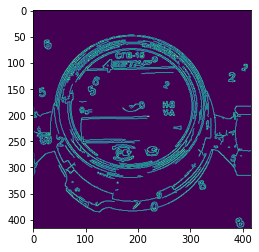

In [12]:
plt.imshow(data[0])

In [13]:
#data[0] = cv2.Canny(data[0],100,200)

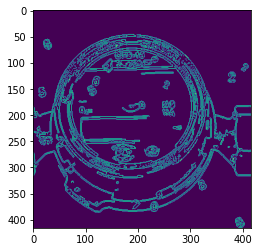

In [14]:
plt.imshow(cv2.Canny(data[0],100,200))